In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
data = pd.read_csv('/home/elizabeth/Downloads/10-academy_Kifya_week-6/src/data/data.csv')

In [3]:
data.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [4]:
data.shape

(95662, 16)

In [5]:
data.dtypes

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [6]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [7]:
data.isna().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

/home/elizabeth/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


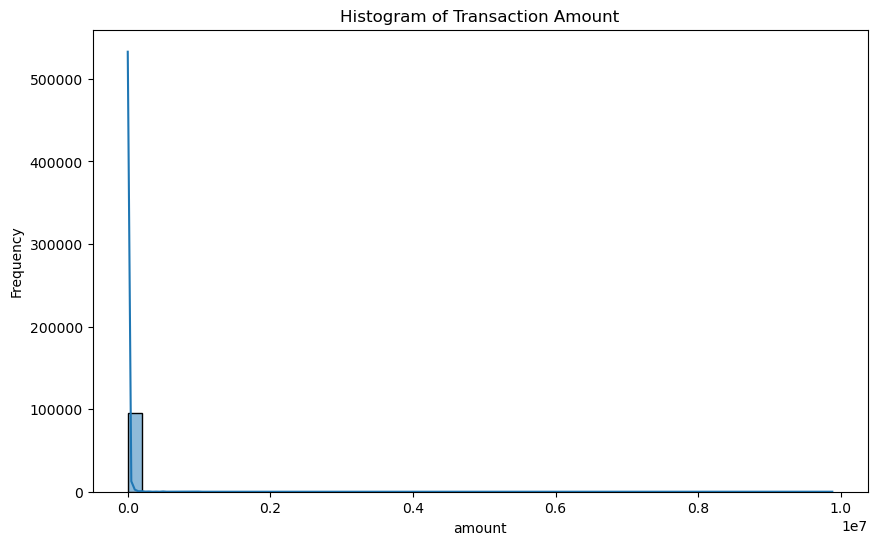

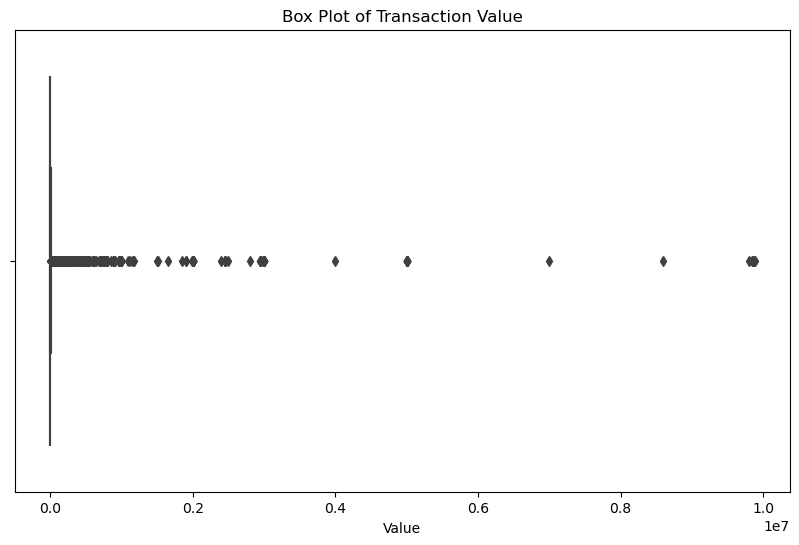

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Value'], bins=50, kde=True)
plt.title('Histogram of Transaction Amount')
plt.xlabel('amount')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Value'])
plt.title('Box Plot of Transaction Value')
plt.show()


/home/elizabeth/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


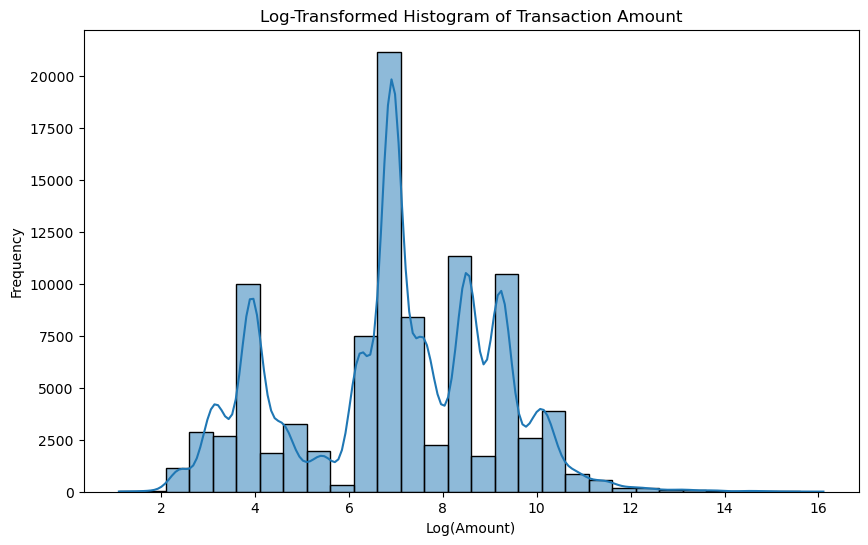

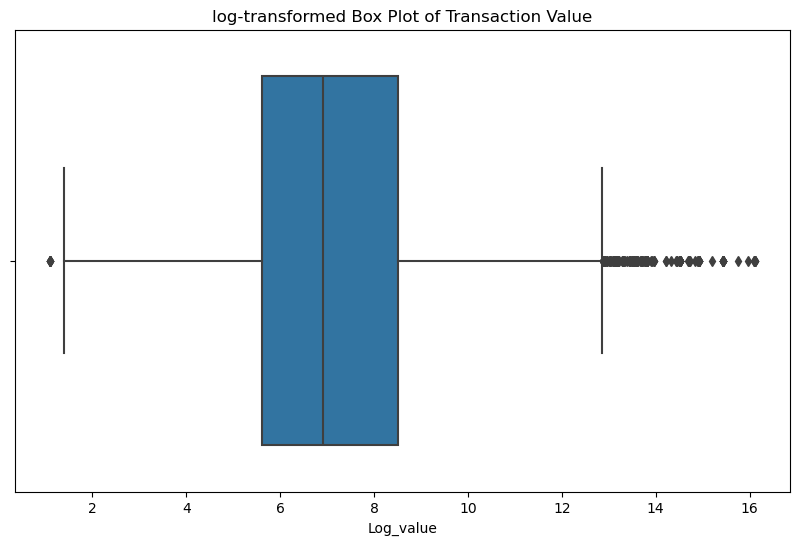

In [9]:
data['Log_value'] = np.log1p(data['Value']) 

# Plot histogram after log transformation
plt.figure(figsize=(10, 6))
sns.histplot(data['Log_value'], bins=30, kde=True)
plt.title('Log-Transformed Histogram of Transaction Amount')
plt.xlabel('Log(Amount)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Log_value'])
plt.title('log-transformed Box Plot of Transaction Value')
plt.show()


In [9]:
print(data['CurrencyCode'].nunique())
print(data['CountryCode'].nunique())

1
1


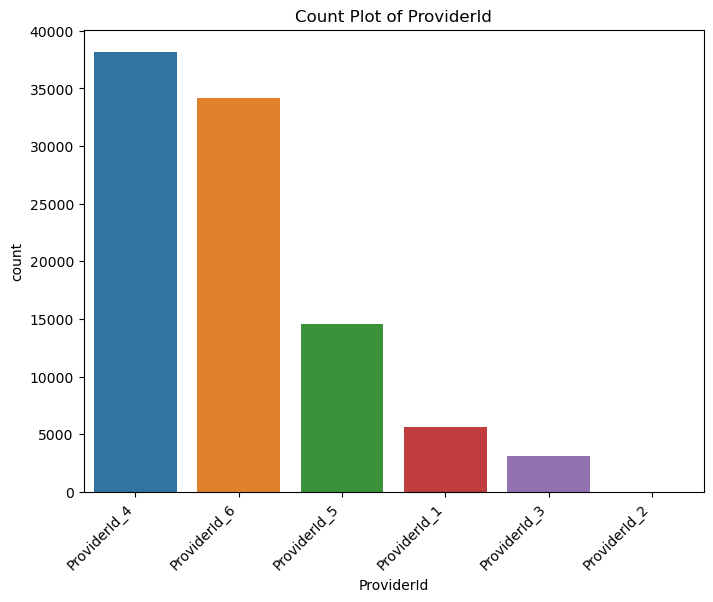

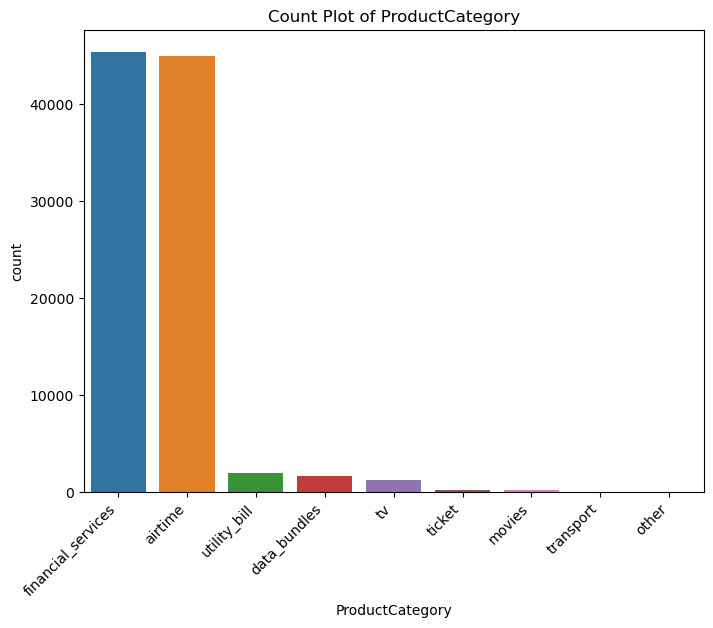

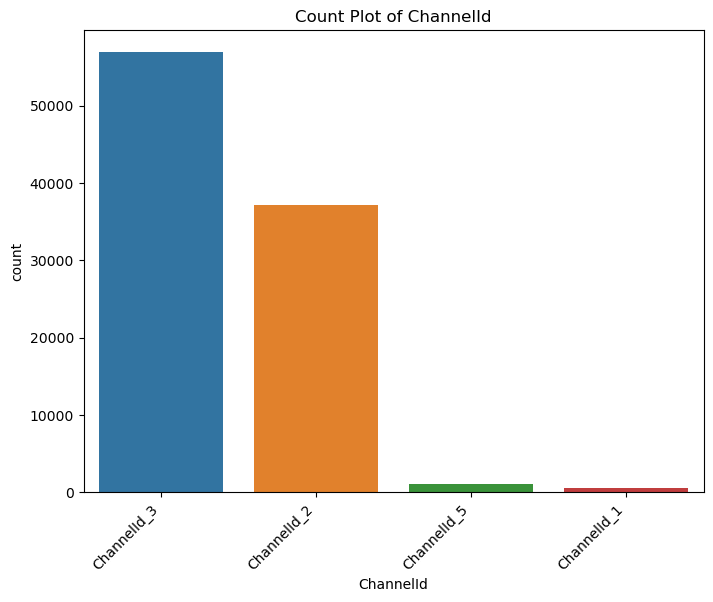

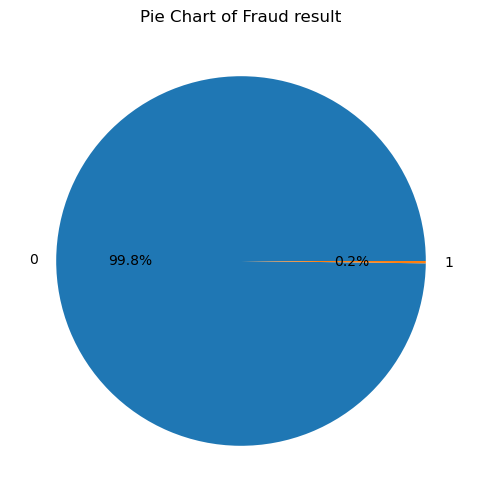

In [14]:
categorical_columns = ['ProviderId', 'ProductCategory', 'ChannelId']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=data[column], order=data[column].value_counts().index)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
    plt.show()
    
plt.figure(figsize=(8, 6))
data['FraudResult'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title(f'Pie Chart of Fraud result')
plt.ylabel('') 
plt.show()


In [5]:
customer_aggregates = data.groupby('CustomerId').agg(
    Total_Transaction_Amount=('Amount', 'sum'),
    Average_Transaction_Amount=('Amount', 'mean'),
    Transaction_Count=('TransactionId', 'count'),
    Std_Dev_Transaction_Amount=('Amount', 'std')
).reset_index()

data = data.merge(customer_aggregates, on='CustomerId', how='left')

data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Dev_Transaction_Amount
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,109921.75,923.712185,119,3042.294251
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,109921.75,923.712185,119,3042.294251
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,1000.00,500.000000,2,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,228727.20,6019.136842,38,17169.241610
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,228727.20,6019.136842,38,17169.241610


In [6]:
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

# Extracting hour, day, month, and year
data['Transaction_Hour'] = data['TransactionStartTime'].dt.hour
data['Transaction_Day'] = data['TransactionStartTime'].dt.day
data['Transaction_Month'] = data['TransactionStartTime'].dt.month
data['Transaction_Year'] = data['TransactionStartTime'].dt.year
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Dev_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2,0,1000.00,500.000000,2,0.000000,2,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018


In [7]:
label_encode_columns = ['BatchId','AccountId', 'SubscriptionId','CustomerId','ProductCategory', 'ChannelId', 'CurrencyCode', 'ProviderId','ProductId']
  
label_encoder = LabelEncoder()

for col in label_encode_columns:
    data[col + '_LabelEncoded'] = label_encoder.fit_transform(data[col])

pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)   
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Dev_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,BatchId_LabelEncoded,AccountId_LabelEncoded,SubscriptionId_LabelEncoded,CustomerId_LabelEncoded,ProductCategory_LabelEncoded,ChannelId_LabelEncoded,CurrencyCode_LabelEncoded,ProviderId_LabelEncoded,ProductId_LabelEncoded
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018,46980,2490,3535,2584,0,2,0,5,1
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018,31755,3219,2366,2584,2,1,0,3,19
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,1000.00,500.000000,2,0.000000,2,15,11,2018,60272,2713,996,2806,0,2,0,5,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018,1797,3351,974,3733,8,2,0,0,11
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018,48941,3219,2366,3733,2,1,0,3,19


In [8]:
from sklearn.preprocessing import MinMaxScaler
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
  
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Dev_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,BatchId_LabelEncoded,AccountId_LabelEncoded,SubscriptionId_LabelEncoded,CustomerId_LabelEncoded,ProductCategory_LabelEncoded,ChannelId_LabelEncoded,CurrencyCode_LabelEncoded,ProviderId_LabelEncoded,ProductId_LabelEncoded
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,0.0,ProviderId_6,ProductId_10,airtime,ChannelId_3,0.092004,0.000101,2018-11-15 02:18:49+00:00,0.5,0.0,0.557522,0.047184,0.028851,0.000919,2,15,11,2018,0.495528,0.685573,0.974903,0.690724,0.00,0.666667,0.0,1.0,0.045455
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,0.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,0.091910,0.000002,2018-11-15 02:19:08+00:00,0.5,0.0,0.557522,0.047184,0.028851,0.000919,2,15,11,2018,0.334940,0.886289,0.652510,0.690724,0.25,0.333333,0.0,0.6,0.863636
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,0.0,ProviderId_6,ProductId_1,airtime,ChannelId_3,0.091958,0.000050,2018-11-15 02:44:21+00:00,0.5,0.0,0.556944,0.047137,0.000244,0.000000,2,15,11,2018,0.635727,0.746971,0.274683,0.750067,0.00,0.666667,0.0,1.0,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,0.0,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,0.093750,0.002206,2018-11-15 03:32:55+00:00,0.5,0.0,0.558153,0.047749,0.009046,0.005187,3,15,11,2018,0.018954,0.922632,0.268616,0.997862,1.00,0.666667,0.0,0.0,0.500000
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,0.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,0.091853,0.000065,2018-11-15 03:34:21+00:00,0.5,0.0,0.558153,0.047749,0.009046,0.005187,3,15,11,2018,0.516212,0.886289,0.652510,0.997862,0.25,0.333333,0.0,0.6,0.863636


/home/elizabeth/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/elizabeth/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/elizabeth/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/elizabeth/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

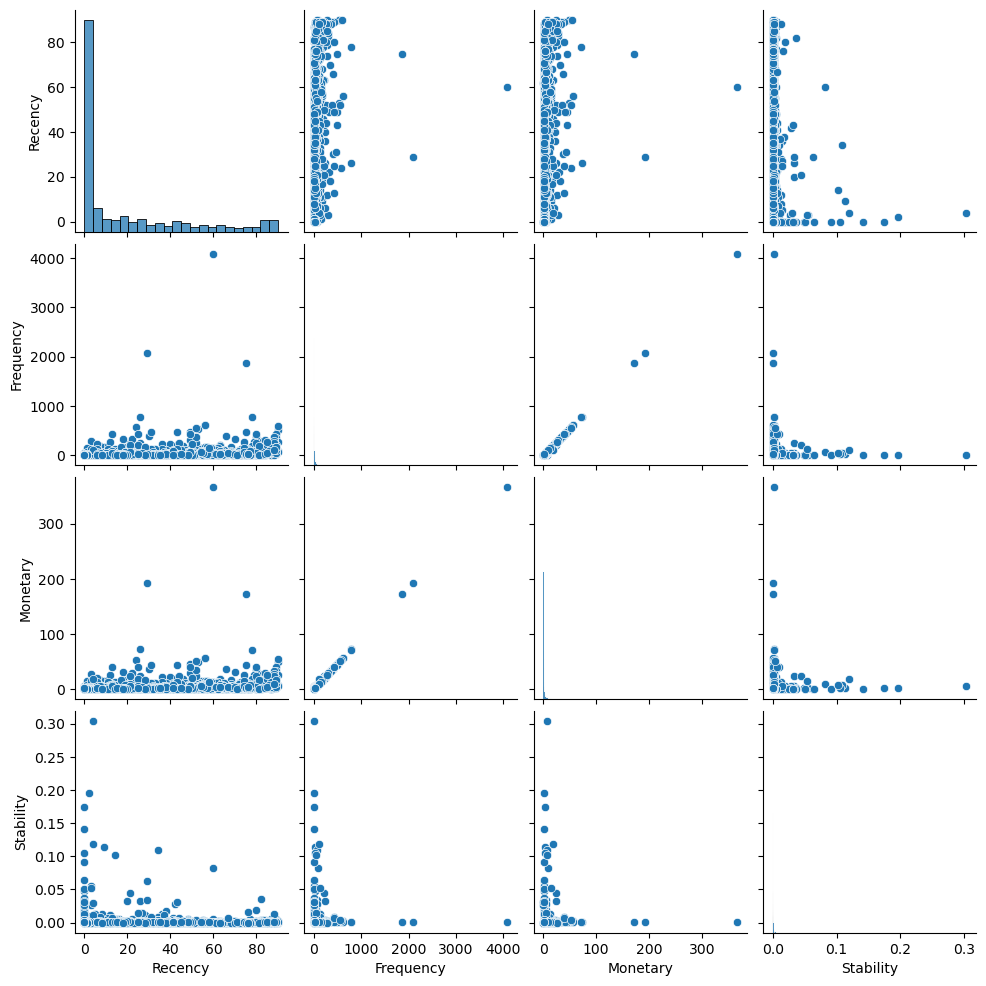

In [9]:
# Recency: Time since last transaction
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])
recency = data.groupby('CustomerId')['TransactionStartTime'].apply(lambda x: (x.max() - x.min()).days)


frequency = data.groupby('CustomerId')['TransactionId'].count()
monetary = data.groupby('CustomerId')['Amount'].sum()
stability = data.groupby('CustomerId')['Amount'].std()

rfms_df = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary,
    'Stability': stability
}).reset_index()

# Fill missing values in 'Stability' with 0 (since some customers may only have one transaction)
rfms_df['Stability'].fillna(0, inplace=True)

sns.pairplot(rfms_df)


In [11]:
rfms_df.describe()

,Recency,Frequency,Monetary,Stability
count,3742.000000,3742.000000,3742.000000,3742.000000
mean,18.960449,25.564404,2.365454,0.001250
std,26.871670,96.929602,8.820600,0.008906
min,0.000000,1.000000,0.073529,0.000000
25%,0.000000,2.000000,0.193072,0.000046
50%,3.000000,7.000000,0.643747,0.000293
75%,32.000000,20.000000,1.888443,0.000620
max,90.000000,4091.000000,366.369485,0.304220


In [19]:
rfms_df['Risk'] = np.where(
    (rfms_df['Recency'] > 32) & 
    (rfms_df['Frequency'] < 7) & 
    (rfms_df['Monetary'] < 1.888) & 
    (rfms_df['Stability'] > 0.00062), 
    '0', 
    '1'
)
print(rfms_df['Risk'].value_counts())

Risk
1    3726
0      16
Name: count, dtype: int64


In [1]:
import scorecardpy as sc
from monotonic_binning.monotonic_woe_binning import Binning

In [ ]:
from woe import WoE

woe_encoder = WoE()

woe_encoder.fit(rfms_df['Risk'], data['FraudResult'])

rfms_df['Risk_WoE'] = woe_encoder.transform(rfms_df['Risk'])

print(rfms_df[['Risk', 'Risk_WoE']].head())
